In [41]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

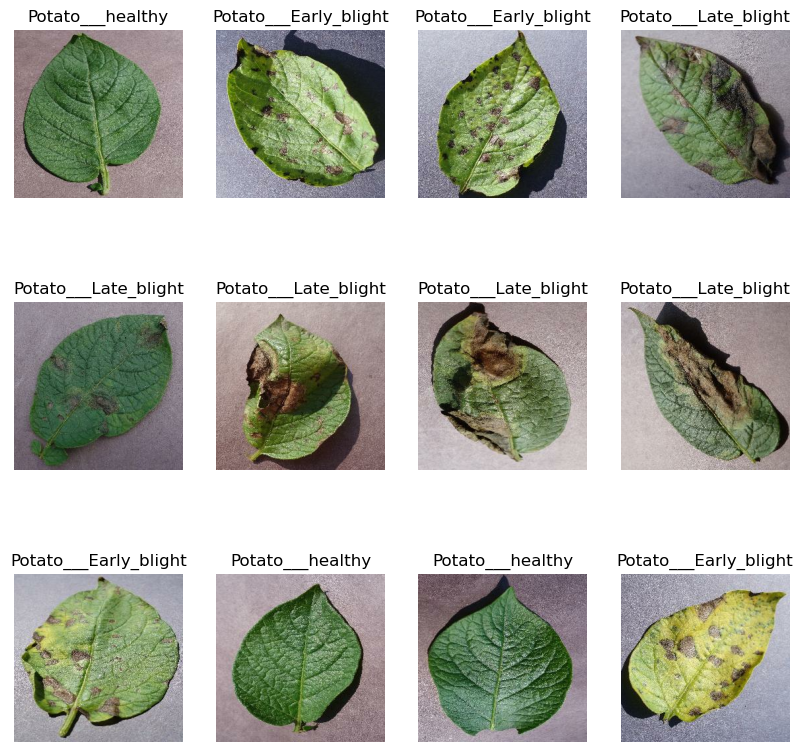

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

68

In [8]:
# training 80%
# validation 10%
# testing 10%

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds=dataset.take(54)
len(train_ds)

54

In [11]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [23]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 155s 3s/step - loss: 0.9010 - accuracy: 0.5208 - val_loss: 0.8535 - val_accuracy: 0.6406
Epoch 2/50
54/54 [==============================] - 106s 2s/step - loss: 0.6447 - accuracy: 0.7274 - val_loss: 0.5642 - val_accuracy: 0.7708
Epoch 3/50
54/54 [==============================] - 100s 2s/step - loss: 0.4160 - accuracy: 0.8200 - val_loss: 0.3160 - val_accuracy: 0.8646
Epoch 4/50
54/54 [==============================] - 148s 3s/step - loss: 0.3598 - accuracy: 0.8704 - val_loss: 0.4353 - val_accuracy: 0.8125
Epoch 5/50
54/54 [==============================] - 115s 2s/step - loss: 0.3192 - accuracy: 0.8640 - val_loss: 0.3343 - val_accuracy: 0.8594
Epoch 6/50
54/54 [==============================] - 108s 2s/step - loss: 0.2336 - accuracy: 0.9115 - val_loss: 0.2369 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 118s 2s/step - loss: 0.2472 - accuracy: 0.9062 - val_loss: 0.1763 - val_accuracy: 0.9375
Epoch 8/50
54

In [27]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 14s 411ms/step - loss: 0.0384 - accuracy: 0.9883


In [28]:
scores

[0.03838419169187546, 0.98828125]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
history.history['accuracy']

[0.5208333134651184,
 0.7274305820465088,
 0.8200231194496155,
 0.8703703880310059,
 0.8640046119689941,
 0.9114583134651184,
 0.90625,
 0.9282407164573669,
 0.9149305820465088,
 0.9421296119689941,
 0.9322916865348816,
 0.9560185074806213,
 0.9571759104728699,
 0.9542824029922485,
 0.9646990895271301,
 0.9450231194496155,
 0.9635416865348816,
 0.9415509104728699,
 0.9519675970077515,
 0.9745370149612427,
 0.9826388955116272,
 0.9756944179534912,
 0.9849537014961243,
 0.9612268805503845,
 0.9681712985038757,
 0.9774305820465088,
 0.9866898059844971,
 0.9762731194496155,
 0.9895833134651184,
 0.9733796119689941,
 0.9872685074806213,
 0.9832175970077515,
 0.9878472089767456,
 0.9780092835426331,
 0.9878472089767456,
 0.9890046119689941,
 0.9855324029922485,
 0.9884259104728699,
 0.9913194179534912,
 0.9849537014961243,
 0.9803240895271301,
 0.9907407164573669,
 0.9878472089767456,
 0.9832175970077515,
 0.9849537014961243,
 0.9924768805503845,
 0.9913194179534912,
 0.9895833134651184,
 0.

In [33]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

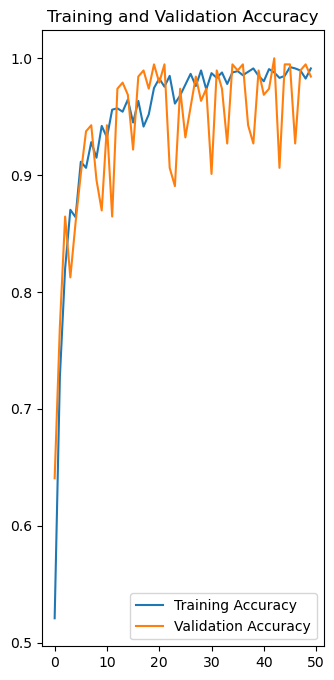

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
first image's actual label:  Potato___Early_blight
1/1 [==============================] - 0s 390ms/step
predicted label:  Potato___Early_blight


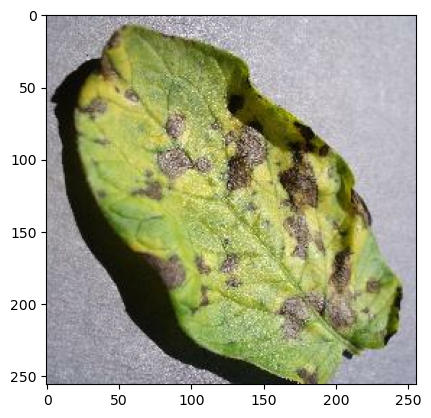

In [44]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [45]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 68ms/step


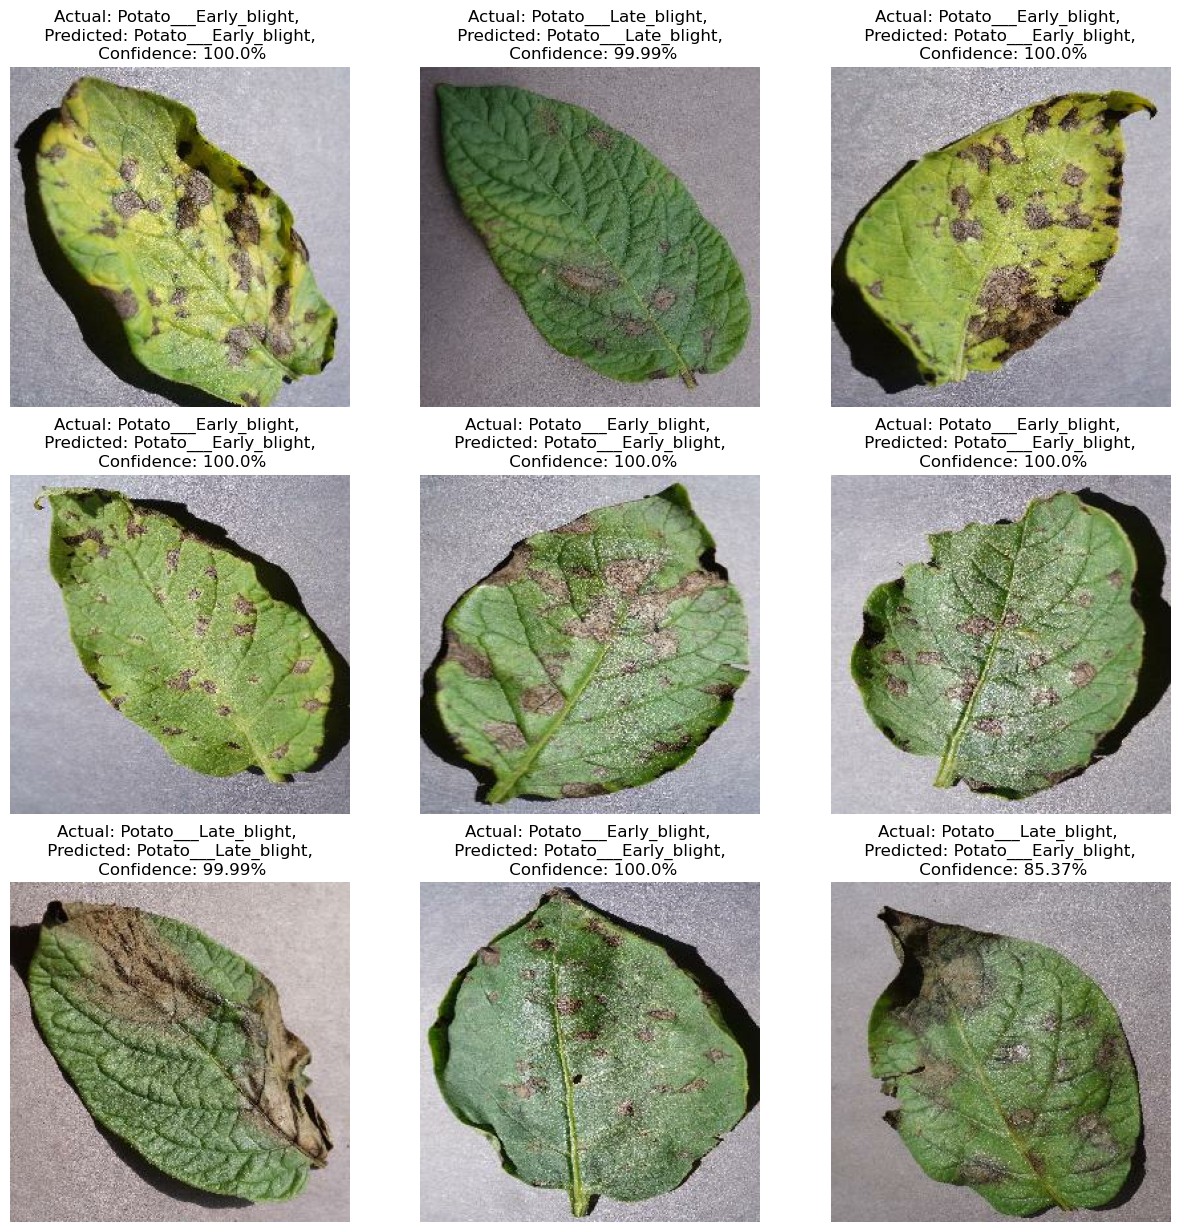

In [49]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence=predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        
        plt.axis("off")

In [55]:
import os
model_version=max([int(i) for i in os.listdir("./models")+[0]])+1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/2\assets


INFO:tensorflow:Assets written to: ./models/2\assets
